# Predicting Blood Donation for Future Expectancy

# 1. Inspecting transfusion.data file

In [1]:
import numpy as np
import pandas as pd


In [2]:
path = 'transfusion/transfusion.data'

In [18]:
with open(path) as in_file:
    for line in in_file:
        print(line)

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"

2 ,50,12500,98 ,1

0 ,13,3250,28 ,1

1 ,16,4000,35 ,1

2 ,20,5000,45 ,1

1 ,24,6000,77 ,0

4 ,4,1000,4 ,0

2 ,7,1750,14 ,1

1 ,12,3000,35 ,0

2 ,9,2250,22 ,1

5 ,46,11500,98 ,1

4 ,23,5750,58 ,0

0 ,3,750,4 ,0

2 ,10,2500,28 ,1

1 ,13,3250,47 ,0

2 ,6,1500,15 ,1

2 ,5,1250,11 ,1

2 ,14,3500,48 ,1

2 ,15,3750,49 ,1

2 ,6,1500,15 ,1

2 ,3,750,4 ,1

2 ,3,750,4 ,1

4 ,11,2750,28 ,0

2 ,6,1500,16 ,1

2 ,6,1500,16 ,1

9 ,9,2250,16 ,0

4 ,14,3500,40 ,0

4 ,6,1500,14 ,0

4 ,12,3000,34 ,1

4 ,5,1250,11 ,1

4 ,8,2000,21 ,0

1 ,14,3500,58 ,0

4 ,10,2500,28 ,1

4 ,10,2500,28 ,1

4 ,9,2250,26 ,1

2 ,16,4000,64 ,0

2 ,8,2000,28 ,1

2 ,12,3000,47 ,1

4 ,6,1500,16 ,1

2 ,14,3500,57 ,1

4 ,7,1750,22 ,1

2 ,13,3250,53 ,1

2 ,5,1250,16 ,0

2 ,5,1250,16 ,1

2 ,5,1250,16 ,0

4 ,20,5000,69 ,1

4 ,9,2250,28 ,1

2 ,9,2250,36 ,0

2 ,2,500,2 ,0

2 ,2,500,2 ,0

2 ,2,500,2 ,0

2 ,11,2750,46 ,0

2 ,

# 2. Loading the blood donations data

In [19]:
data = pd.read_csv(path)

# 3. Inspecting transfusion DataFrame

In [20]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [22]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# 4. Creating target column

In [23]:
data['target'] = data['whether he/she donated blood in March 2007']

In [24]:
data = data.drop('whether he/she donated blood in March 2007', axis = 1)

In [25]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# 6. Checking target incidence

In [26]:
data.target.unique()

array([1, 0], dtype=int64)

In [27]:
data.target.value_counts(normalize = True)

0    0.762032
1    0.237968
Name: target, dtype: float64

Text(0.5, 15.0, 'RFMT')

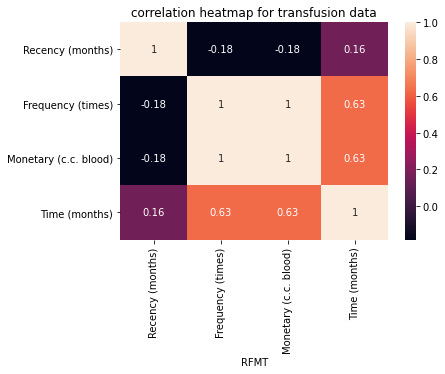

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

mat = data.drop(columns='target', axis = 1)
correlation_mat = mat.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title('correlation heatmap for transfusion data')
plt.xlabel('RFMT')

# 7. Splitting transfusion into train and test datasets

In [33]:
from sklearn.model_selection import train_test_split

In [37]:
train_x, test_x, train_y, test_y = train_test_split(    data.drop(columns='target'),
                                                        data.target, test_size=0.25,
                                                        random_state=42, stratify=data.target)

In [38]:
train_x.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26
116,2,7,1750,46
661,16,2,500,16
154,2,1,250,2


In [17]:
train_y.head()

334    0
99     1
116    1
661    0
154    0
Name: target, dtype: int64

# 8. Selecting model using TPOT